In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [36]:
df = pd.read_csv(r'C:\Users\LENOVO\Documents\GitHub\Data-mining-project\datasets_final\final_dataset.csv')

In [37]:
df.head()

,region,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,popular
0,3,0.685,0.644,10,-13.206,0,0.1550,0.302,0.000055,0.1140,0.808,164.919,169379,4,0
1,3,0.752,0.620,5,-5.536,1,0.0509,0.309,0.000000,0.0750,0.962,117.399,164459,4,0
2,1,0.748,0.627,7,-6.029,1,0.0639,0.131,0.000000,0.0852,0.524,120.963,188491,4,0
3,2,0.748,0.627,7,-6.029,1,0.0639,0.131,0.000000,0.0852,0.524,120.963,188491,4,0
4,3,0.748,0.627,7,-6.029,1,0.0639,0.131,0.000000,0.0852,0.524,120.963,188491,4,0


In [38]:
# X contains the features and y contains the target(popular)
X = df.drop('popular', axis=1)  # Drop the target column, keeping only features
y = df['popular']  # Target variable (1 for popular, 0 for not popular)

In [39]:
#Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [40]:
#Train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42) 
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [41]:
# Make predictions on the test set
y_pred = clf.predict(X_test)


In [42]:
#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [43]:
# Output results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 75.97%
Confusion Matrix:
[[46968  8372]
 [ 7239  2374]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86     55340
           1       0.22      0.25      0.23      9613

    accuracy                           0.76     64953
   macro avg       0.54      0.55      0.55     64953
weighted avg       0.77      0.76      0.77     64953



In [44]:
# Visualize the decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


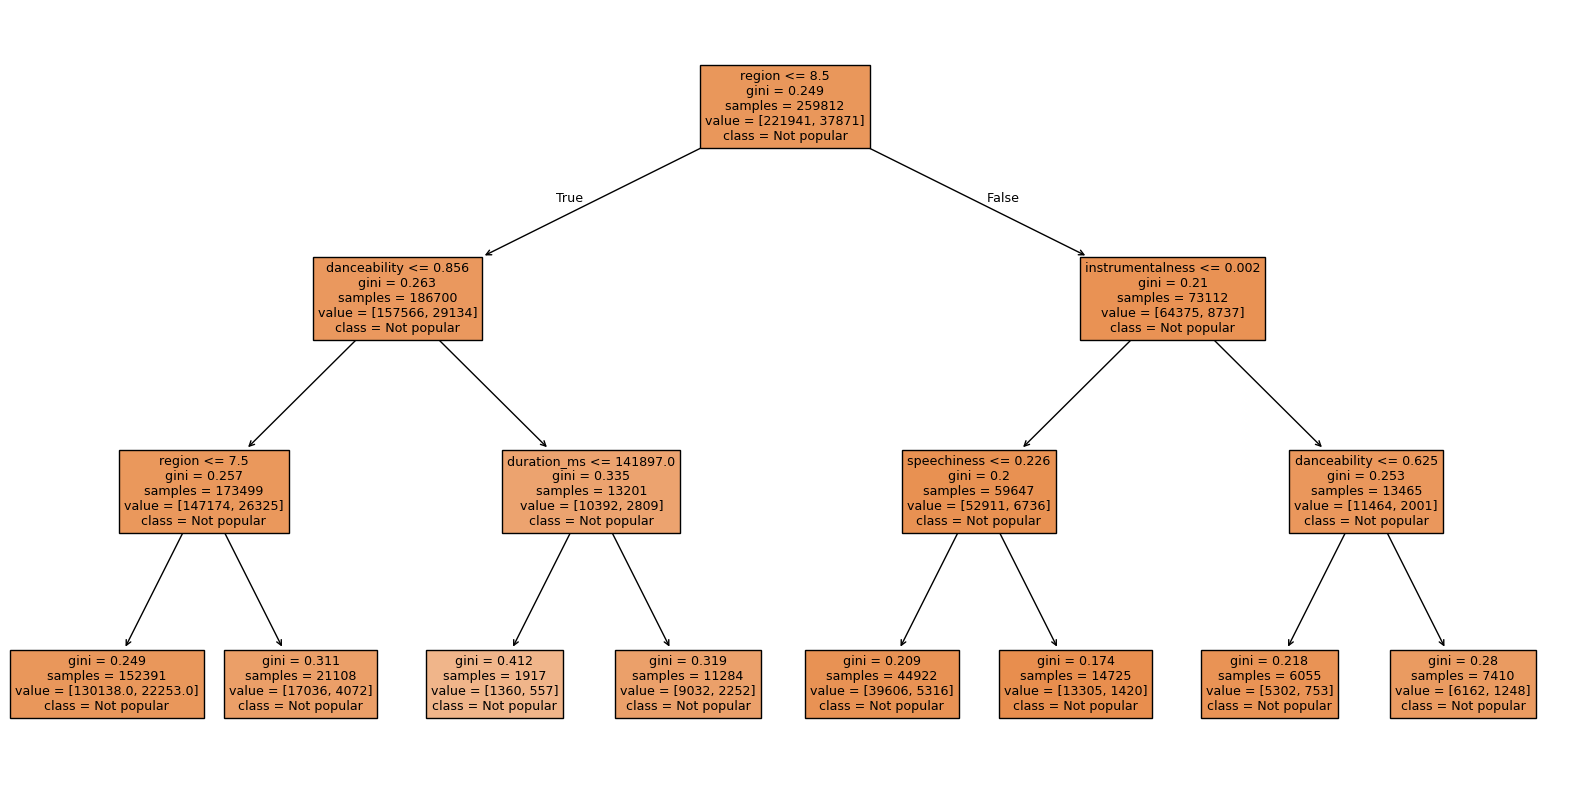

In [45]:
clf = DecisionTreeClassifier(max_depth=3, random_state=42)  # Set max depth
clf.fit(X_train, y_train)  # Fit the model on the training data

plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Not popular', 'Popular'])
plt.show()

In [46]:
import seaborn as sns

In [47]:
def evaluation_of_classifier(clf, xtrain, ytrain, xtest, ytest, clf_name):
    clf.fit(xtrain, ytrain)
    ypred = clf.predict(xtest)
    print(f"Classification Report for {clf_name}:")
    print(classification_report(ytest, ypred))
    accuracy_val = accuracy_score(ytest, ypred)
    print(f'{clf_name} Validation Accuracy: {accuracy_val:.2%}')
    conf_matrix = confusion_matrix(ytest, ypred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix for {clf_name}')
    plt.show()

In [48]:
decision_t=DecisionTreeClassifier()

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86     55340
           1       0.22      0.24      0.23      9613

    accuracy                           0.76     64953
   macro avg       0.54      0.55      0.55     64953
weighted avg       0.77      0.76      0.77     64953

Decision Tree Validation Accuracy: 76.09%


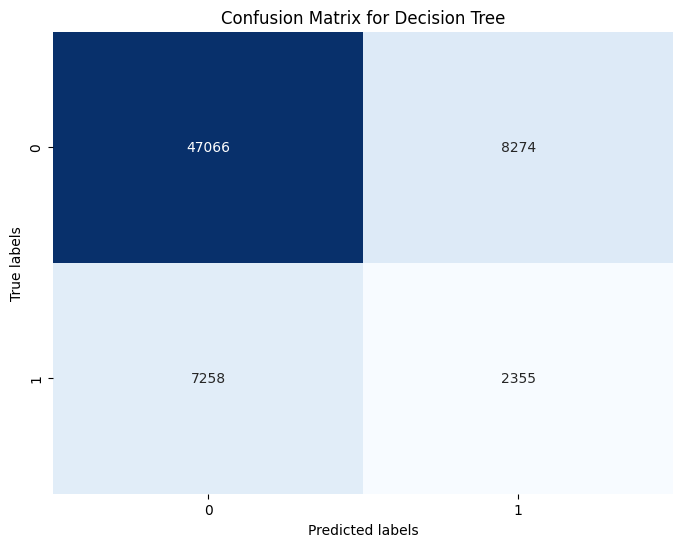

In [49]:
evaluation_of_classifier(decision_t, X_train, y_train, X_test, y_test, "Decision Tree")

In [50]:
# Feature importance
importance = clf.feature_importances_
feature_importance = pd.Series(importance, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)
print(feature_importance)

region              0.565965
danceability        0.266342
instrumentalness    0.071338
duration_ms         0.069208
speechiness         0.027147
energy              0.000000
mode                0.000000
loudness            0.000000
key                 0.000000
acousticness        0.000000
liveness            0.000000
valence             0.000000
tempo               0.000000
time_signature      0.000000
dtype: float64


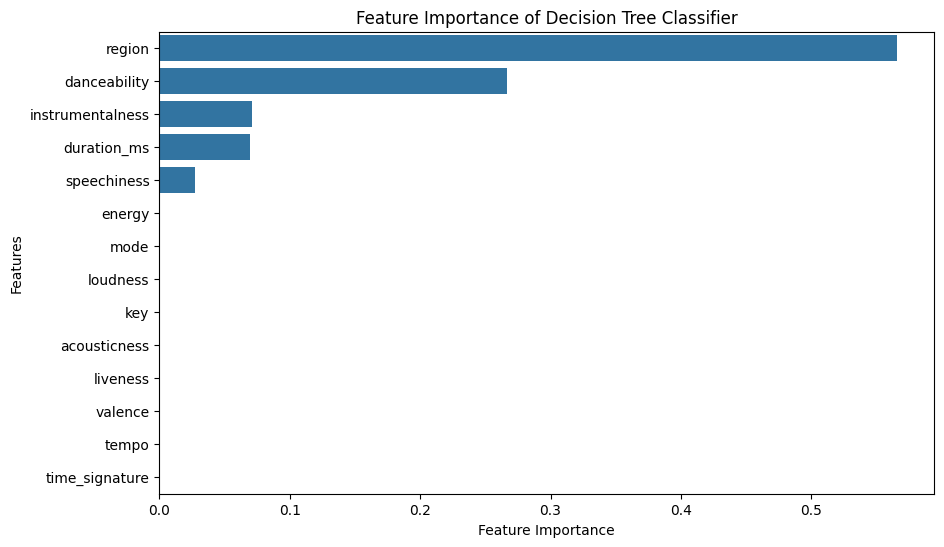

In [51]:
# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance of Decision Tree Classifier')
plt.show()

In [52]:
#Add prediction to the dataset
df['prediction'] = clf.predict(X)



In [53]:
# Group by region and analyze the mean of each audio feature
region_analysis = df.groupby('region').mean()

print(region_analysis)

        danceability    energy       key  loudness      mode  speechiness  \
region                                                                      
0           0.686295  0.619734  5.206424 -7.608736  0.507380     0.137555   
1           0.603382  0.629306  5.294207 -6.861704  0.678162     0.079573   
2           0.661498  0.641239  5.287374 -7.342089  0.540551     0.129643   
3           0.663322  0.660444  5.356673 -6.707045  0.592774     0.105519   
4           0.642029  0.611241  5.288157 -7.634013  0.461966     0.104671   
5           0.657891  0.620176  5.185422 -6.990812  0.609833     0.131226   
6           0.642139  0.635878  5.316541 -7.348868  0.562723     0.108689   
7           0.647060  0.630660  5.223630 -7.050239  0.608444     0.115602   
8           0.622576  0.583866  5.239207 -7.393087  0.658991     0.081898   
9           0.649298  0.646239  5.306584 -7.021315  0.563503     0.119060   
10          0.669418  0.642748  5.338206 -7.263375  0.525084     0.145118   

In [54]:
# Create a dictionary to map region codes to region names
region_names = {
    0: 'Africa',
    1: 'East Asia',
    2: 'Eastern Europe',
    3: 'Latin America',
    4: 'Middle East',
    5: 'North America',
    6: 'Northern Europe',
    7: 'Oceania',
    8: 'South Asia',
    9: 'Southern Europe',
    10: 'Western Europe'
}

# Get the unique regions from your dataset
regions = df['region'].unique()


In [55]:
import numpy as np

In [56]:
#Feature importance
importance = clf.feature_importances_
# Sort and plot the feature importances
indices = np.argsort(importance)[::-1]
features = X.columns  # The feature names used in training

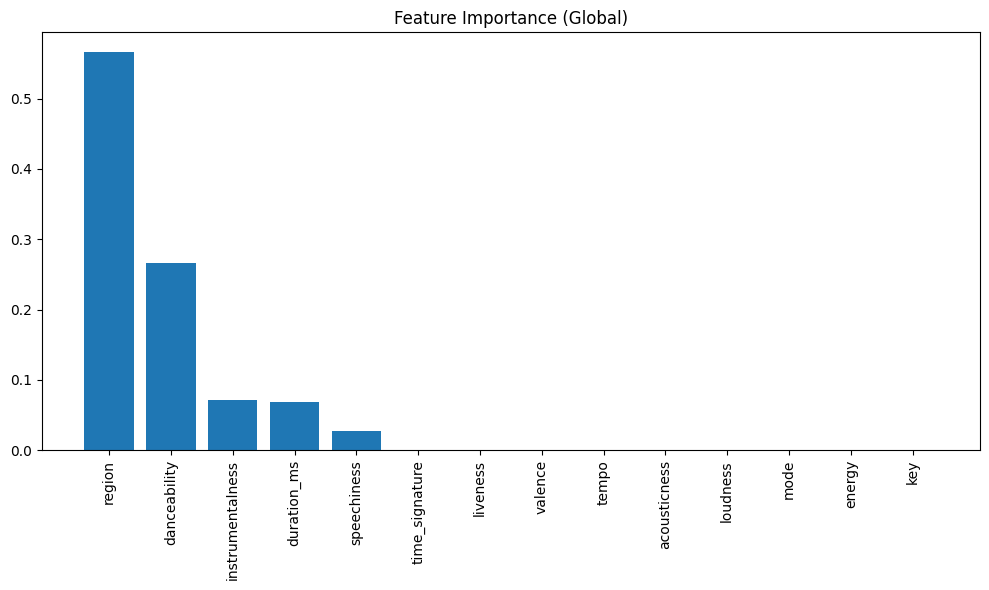

In [57]:
# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importance (Global)")
plt.bar(range(X.shape[1]), importance[indices], align='center')
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()

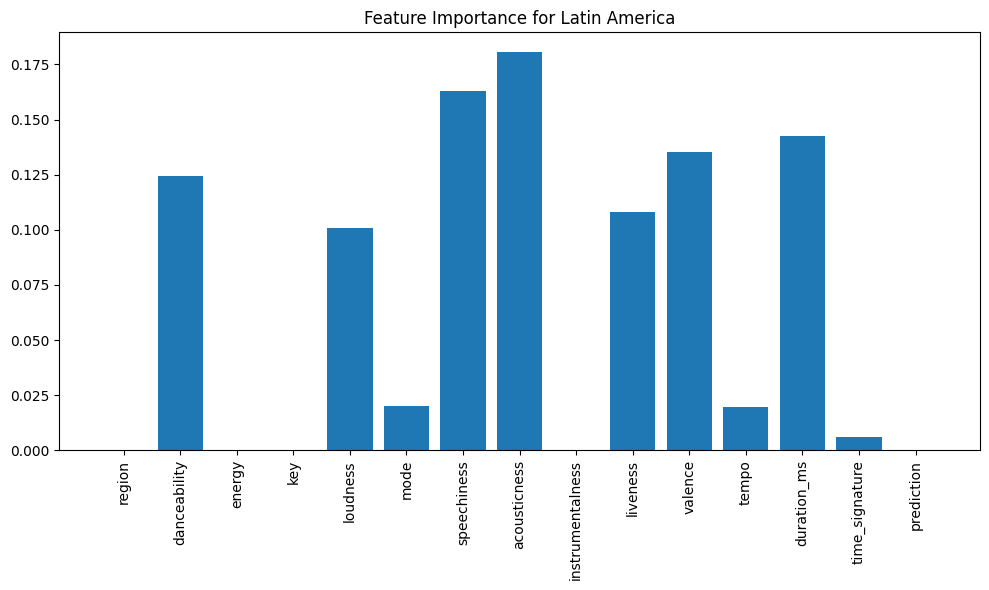

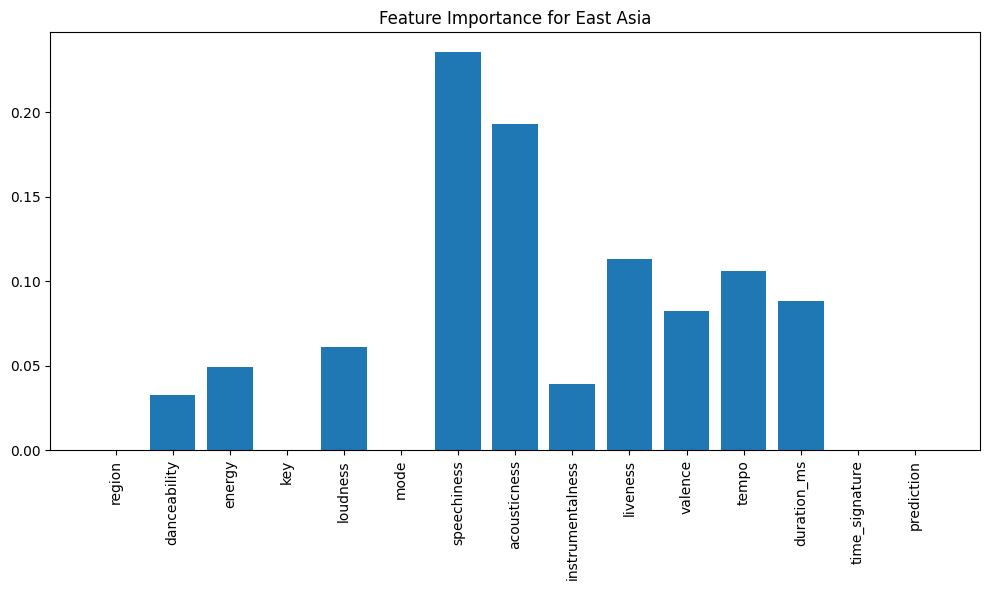

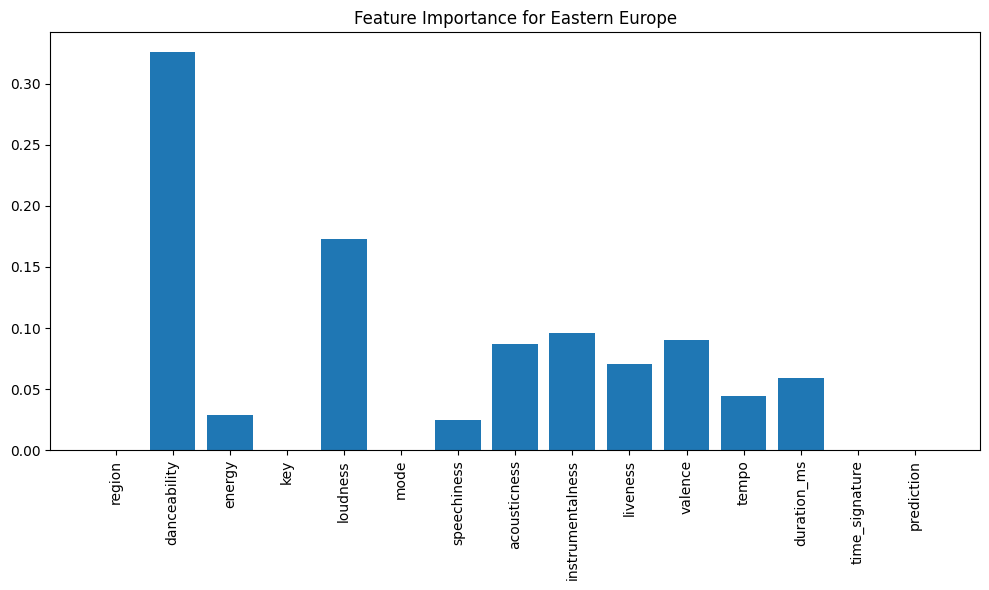

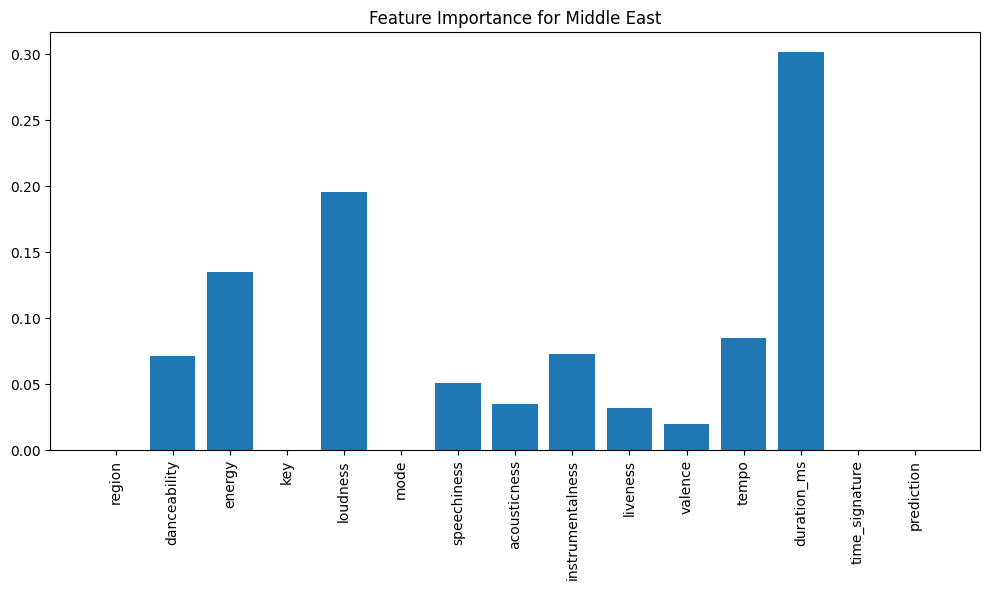

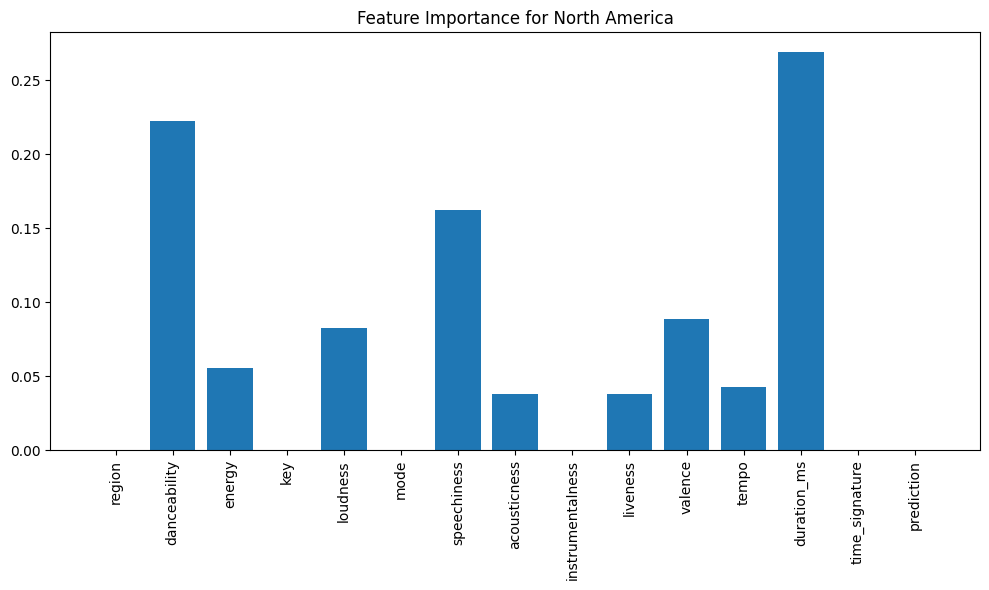

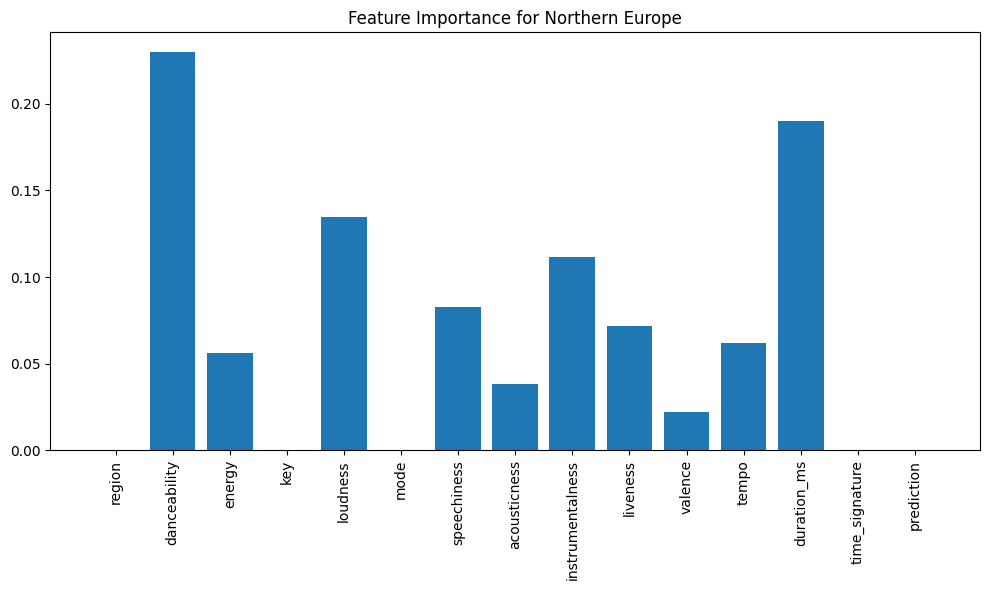

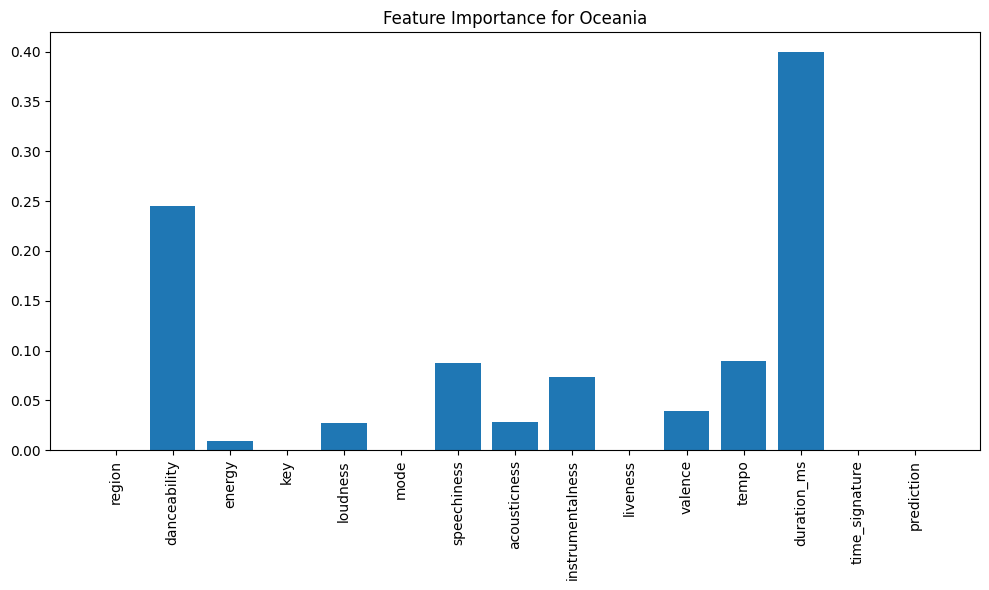

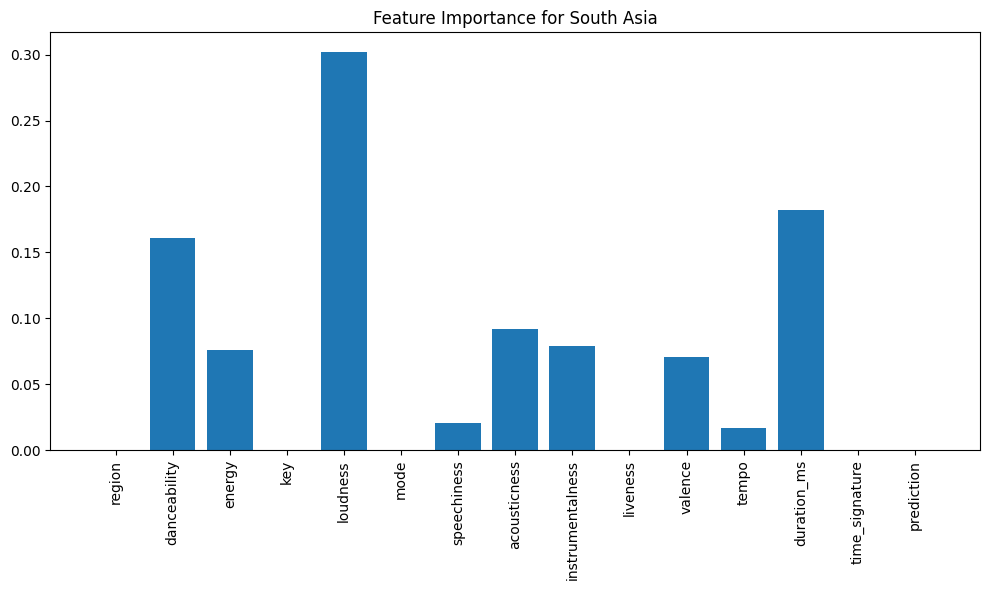

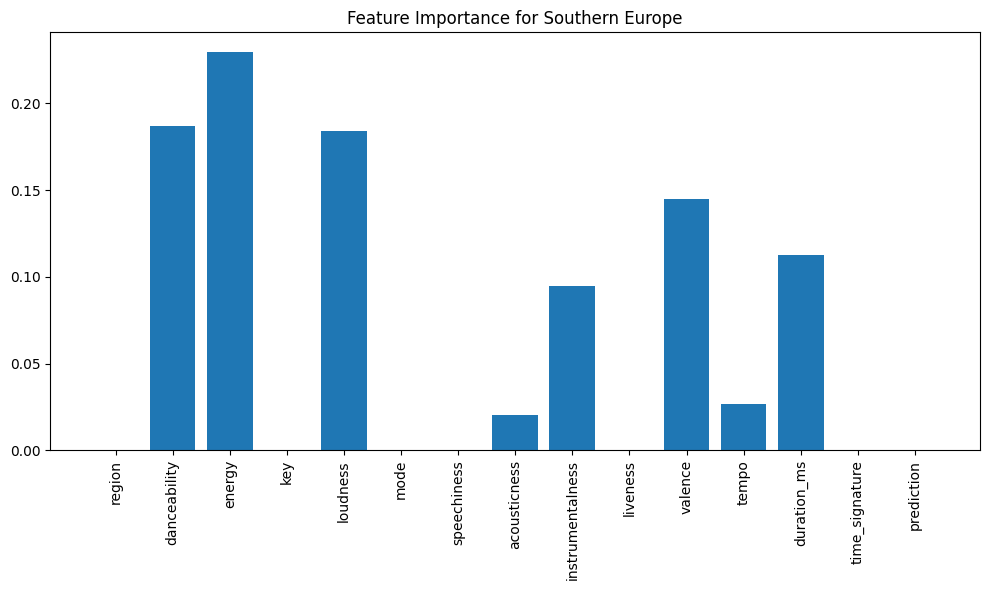

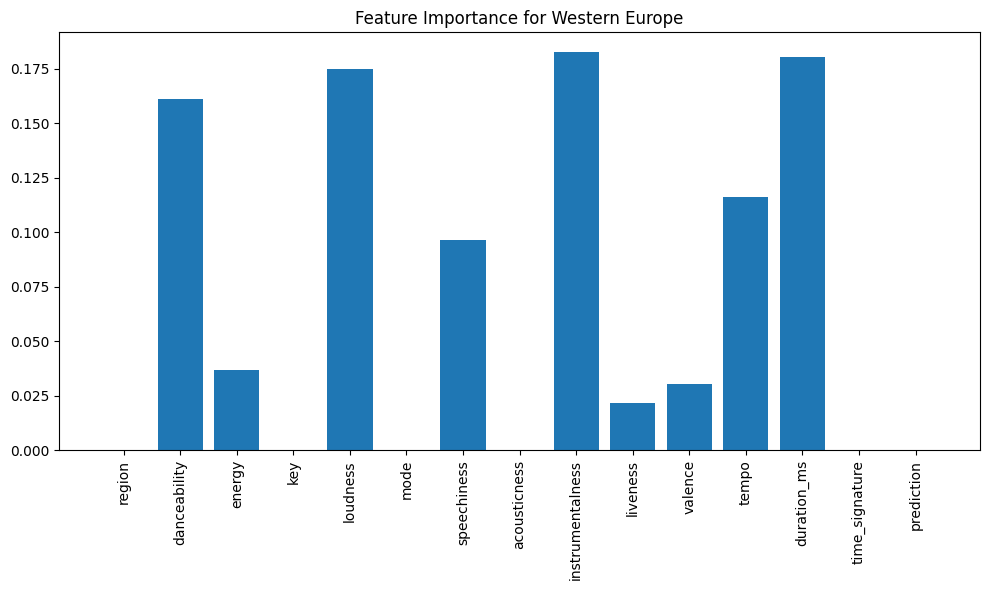

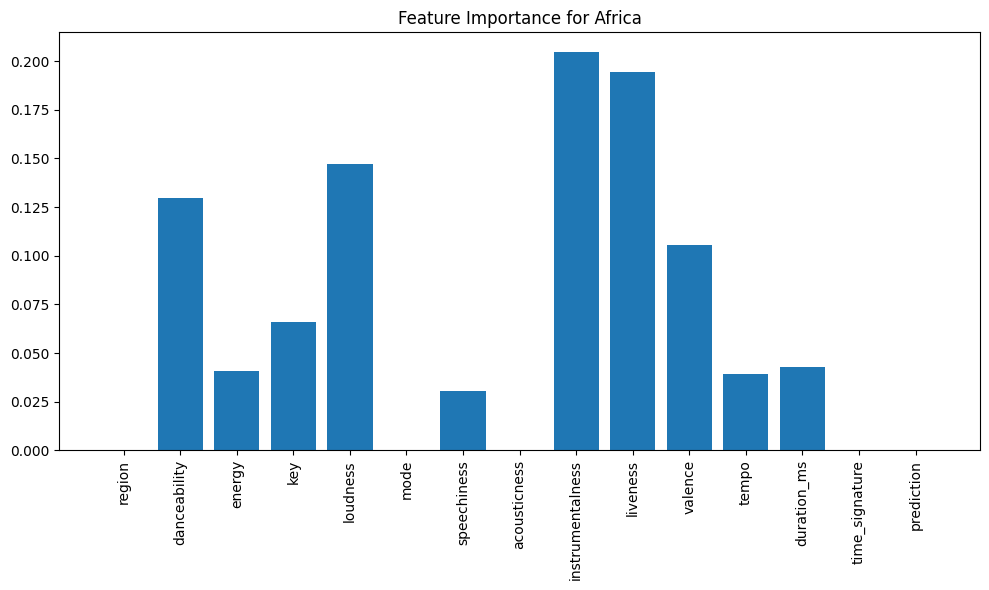

In [58]:
for region in regions:
    # Filter data for the specific region
    region_data = df[df['region'] == region]
    
    # Prepare features and target
    X_region = region_data.drop('popular', axis=1)  # Features for this region
    y_region = region_data['popular']  # Target (popularity)

    # Train a decision tree classifier for this region
    clf_region = DecisionTreeClassifier(max_depth=5, random_state=42)
    clf_region.fit(X_region, y_region)

    # Extract feature importance
    feature_importances_region = clf_region.feature_importances_

    # Get the name of the region from the dictionary
    region_name = region_names.get(region, f"Region {region}")  # Default to "Region {region}" if not found

    # Plot the feature importance for this region
    plt.figure(figsize=(10, 6))
    plt.title(f"Feature Importance for {region_name}")
    plt.bar(range(X_region.shape[1]), feature_importances_region, align='center')
    plt.xticks(range(X_region.shape[1]), X_region.columns, rotation=90)
    plt.tight_layout()
    plt.show()


In [59]:
# Define a threshold for selecting "important" features
importance_threshold = 0.15  # Only consider features with importance > 0.1 as important

for region in regions:
    # Step 3: Filter data for the specific region
    region_data = df[df['region'] == region]
    
    # Prepare features (exclude 'popular') and target ('popular')
    X_region = region_data.drop('popular', axis=1)
    y_region = region_data['popular']
    
    # Step 4: Train a decision tree classifier for this region
    clf_region = DecisionTreeClassifier(max_depth=5, random_state=42)
    clf_region.fit(X_region, y_region)
    
    # Step 5: Extract feature importances
    feature_importances_region = clf_region.feature_importances_

    # Get the important features (those with importance > threshold)
    important_features_indices = np.where(feature_importances_region > importance_threshold)[0]
    important_features = X_region.columns[important_features_indices]
    
    # Step 6: Calculate and display mean values for important features
    region_name = region_names[region]  # Get the region name from the dictionary
    print(f"\nRegion: {region_name} (Code {region}) - Important Features and Their Mean Values:")
    
    for feature in important_features:
        mean_value = region_data[feature].mean()  # Calculate mean value for this feature in the region
        print(f"Feature: {feature}, Mean Value: {mean_value:.2f}")



Region: Latin America (Code 3) - Important Features and Their Mean Values:
Feature: speechiness, Mean Value: 0.11
Feature: acousticness, Mean Value: 0.29

Region: East Asia (Code 1) - Important Features and Their Mean Values:
Feature: speechiness, Mean Value: 0.08
Feature: acousticness, Mean Value: 0.30

Region: Eastern Europe (Code 2) - Important Features and Their Mean Values:
Feature: danceability, Mean Value: 0.66
Feature: loudness, Mean Value: -7.34

Region: Middle East (Code 4) - Important Features and Their Mean Values:
Feature: loudness, Mean Value: -7.63
Feature: duration_ms, Mean Value: 213894.57

Region: North America (Code 5) - Important Features and Their Mean Values:
Feature: danceability, Mean Value: 0.66
Feature: speechiness, Mean Value: 0.13
Feature: duration_ms, Mean Value: 206987.98

Region: Northern Europe (Code 6) - Important Features and Their Mean Values:
Feature: danceability, Mean Value: 0.64
Feature: duration_ms, Mean Value: 203514.75

Region: Oceania (Code 7

In [60]:
# Loop through each region and check the importance of danceability
for region in regions:
    # Filter data for the specific region
    region_data = df[df['region'] == region]
    
    # Prepare features and target
    X_region = region_data.drop('popular', axis=1)  # Features for this region
    y_region = region_data['popular']  # Target (popularity)

    # Train a decision tree classifier for this region
    clf_region = DecisionTreeClassifier(max_depth=5, random_state=42)
    clf_region.fit(X_region, y_region)

    # Extract feature importances
    feature_importances_region = clf_region.feature_importances_

    # Get the index of the danceability feature
    feature_names = X_region.columns
    danceability_index = list(feature_names).index('danceability')

    # Check if danceability is an important feature
    if feature_importances_region[danceability_index] > importance_threshold:
        region_name = region_names.get(region, f"Region {region}")
        print(f"Danceability is an important feature in {region_name}.")

Danceability is an important feature in Eastern Europe.
Danceability is an important feature in North America.
Danceability is an important feature in Northern Europe.
Danceability is an important feature in Oceania.
Danceability is an important feature in South Asia.
Danceability is an important feature in Southern Europe.
Danceability is an important feature in Western Europe.
